In [50]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

In [51]:
Data = pd.read_csv('Data_training_and_val_set_CNvsAD.csv')

In [52]:
Data.head()

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
0,1063,937159,1401690,38855.4,3427.13,3262.01,1045.280,1263.010,2.44566,2.48342,2.47434,2.49197,2.27057,2.11083,2.99752,3.24032,0
1,184,901429,1235930,10081.2,3410.35,3693.69,529.756,391.364,2.52101,2.69526,2.81781,2.76115,2.42640,2.50153,3.40556,3.36431,0
2,16,935565,1345440,21299.0,3621.49,3802.43,887.978,1135.170,2.45128,2.53828,2.40015,2.46122,1.99782,2.40015,3.19497,3.02149,0
3,575,884775,1325760,69220.3,2802.91,3098.38,3215.570,3370.800,2.59348,2.62409,2.50552,2.95271,2.09972,2.12354,2.43217,2.99445,0
4,403,1062950,1498230,32967.7,3416.55,4103.49,1648.410,1480.410,2.78544,2.76651,2.71469,2.54695,2.38363,2.48169,3.71762,3.86305,0


In [53]:
#dropping irrelevant feature
Data.drop(['RID'], axis=1, inplace = True)

In [54]:
Data['DXCURREN'].value_counts()

0    110
1    110
Name: DXCURREN, dtype: int64

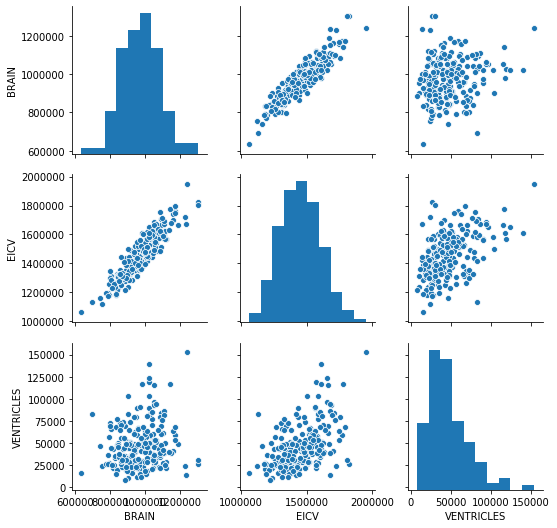

In [55]:
subData = Data[['BRAIN','EICV','VENTRICLES' ]]
sns.pairplot(subData)

In [56]:
Demented = Data[Data.DXCURREN == 1]
Normal = Data[Data.DXCURREN == 0]

In [57]:
Demented.describe()

,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
count,1.100000e+02,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0
mean,9.501246e+05,1.451390e+06,55529.145455,2762.602636,2952.135091,2249.683400,2253.310245,2.218401,2.258468,2.285647,2.290316,2.099536,2.104474,2.499836,2.589077,1.0
std,1.115231e+05,1.668934e+05,27362.518583,549.719272,578.398543,1122.051734,1258.453170,0.261485,0.243170,0.234000,0.254566,0.247222,0.231585,0.452762,0.511080,0.0
min,6.937860e+05,1.118990e+06,11559.900000,1723.310000,1768.950000,638.589000,588.596000,1.495310,1.707950,1.642300,1.677120,1.561400,1.497610,1.560000,1.498440,1.0
25%,8.639480e+05,1.320102e+06,35445.050000,2352.622500,2515.637500,1460.175000,1422.110000,2.060707,2.073625,2.138282,2.113767,1.896297,1.953220,2.179527,2.193643,1.0
50%,9.437925e+05,1.447620e+06,48609.600000,2676.645000,2837.310000,2056.585000,1961.630000,2.236050,2.250745,2.279170,2.309255,2.111795,2.120885,2.483585,2.586340,1.0
75%,1.018635e+06,1.578445e+06,69904.475000,3103.387500,3370.852500,2704.627500,2782.137500,2.426540,2.457730,2.445047,2.459120,2.269547,2.226320,2.807065,2.949220,1.0
max,1.303590e+06,1.949090e+06,152927.000000,4853.350000,4891.560000,6082.040000,7210.340000,2.700150,2.704560,2.891490,2.844490,2.839030,2.790480,3.783510,3.744270,1.0


In [58]:
Normal.describe()

,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
count,1.100000e+02,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0
mean,9.963349e+05,1.458788e+06,38110.280545,3533.095727,3678.580818,1234.750545,1244.294327,2.564385,2.598034,2.620976,2.588706,2.389659,2.365876,3.186655,3.298458,0.0
std,1.008995e+05,1.385857e+05,19498.516050,437.641108,485.292154,600.430303,582.330046,0.164993,0.175526,0.165534,0.185919,0.168340,0.179007,0.359900,0.380936,0.0
min,6.345910e+05,1.059560e+06,7552.460000,2610.820000,2276.750000,296.264000,318.735000,2.144620,2.034030,2.217610,2.073350,1.944840,1.951850,2.102060,1.914300,0.0
25%,9.349688e+05,1.369175e+06,23096.675000,3253.775000,3387.677500,838.165250,857.978250,2.446850,2.479728,2.497962,2.465785,2.292543,2.246135,2.997032,3.141375,0.0
50%,9.915630e+05,1.458785e+06,35090.050000,3494.130000,3739.525000,1198.935000,1166.515000,2.576560,2.590250,2.616785,2.605465,2.388425,2.356490,3.240530,3.352955,0.0
75%,1.056188e+06,1.562318e+06,48850.825000,3775.557500,3913.955000,1505.482500,1506.007500,2.683677,2.722417,2.746993,2.708745,2.502875,2.479872,3.415535,3.522813,0.0
max,1.301340e+06,1.823070e+06,118808.000000,5514.940000,5750.400000,4551.830000,4081.390000,2.949880,3.010460,3.048830,3.141290,2.817160,2.770310,3.760310,4.075010,0.0


In [59]:
print("(Demented Patients Brain Volume): " + str(Demented['BRAIN'].mean()))
print("(Normal Patients Brain Volume): " + str(Normal['BRAIN'].mean()))

(Demented Patients Brain Volume): 950124.6454545455
(Normal Patients Brain Volume): 996334.9363636364


In [60]:
print("(Demented Patients Intracranial Volume): " + str(Demented['EICV'].mean()))
print("(Normal Patients Intracranial Volume): " + str(Normal['EICV'].mean()))

(Demented Patients Intracranial Volume): 1451390.1818181819
(Normal Patients Intracranial Volume): 1458788.2727272727


In [61]:
print("(Demented Patients Ventricle Volume): " + str(Demented['VENTRICLES'].mean()))
print("(Normal Patients Ventricle Volume): " + str(Normal['VENTRICLES'].mean()))

(Demented Patients Ventricle Volume): 55529.14545454543
(Normal Patients Ventricle Volume): 38110.28054545453


# Building The Models 

In [62]:
X = Data.iloc[:, :-1].values
y = Data.iloc[:, -1].values

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)  

# Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training (logistic regression)

In [65]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.81      0.89      0.85        28

    accuracy                           0.86        66
   macro avg       0.86      0.87      0.86        66
weighted avg       0.87      0.86      0.86        66



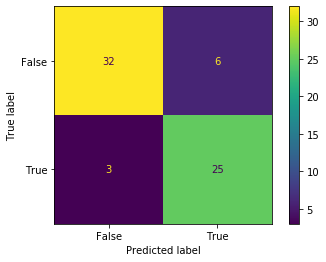

In [66]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [67]:
Accuracy = metrics.accuracy_score(y_test, y_pred1)
print(Accuracy)

0.8636363636363636


# Training (K Nearest Neighbor)

In [68]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.86      0.86      0.86        28

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



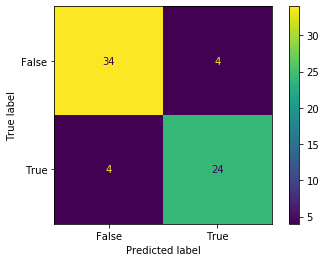

In [69]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [70]:
Accuracy = metrics.accuracy_score(y_test, y_pred2)
print(Accuracy)

0.8787878787878788


# Training (Support Vector Machine)

In [71]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.83      0.89      0.86        28

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



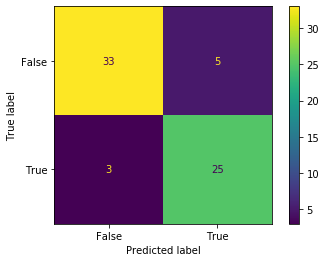

In [72]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [73]:
Accuracy = metrics.accuracy_score(y_test, y_pred3)
print(Accuracy)

0.8787878787878788


# Training (Naive Bayes Classifier)

In [74]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.86      0.86      0.86        28

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



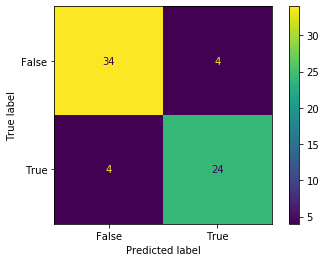

In [75]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [76]:
Accuracy = metrics.accuracy_score(y_test, y_pred4)
print(Accuracy)

0.8787878787878788


# Training(Decision Tree)

In [77]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.81      0.89      0.85        28

    accuracy                           0.86        66
   macro avg       0.86      0.87      0.86        66
weighted avg       0.87      0.86      0.86        66



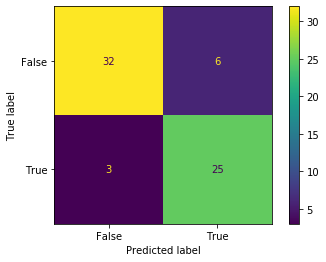

In [78]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [79]:
Accuracy = metrics.accuracy_score(y_test, y_pred5)
print(Accuracy)

0.8636363636363636


# Training(Random Forest)

In [80]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.83      0.89      0.86        28

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



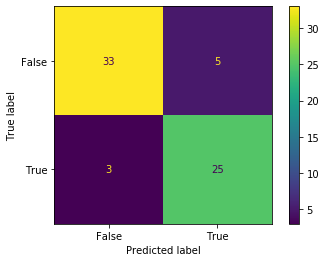

In [81]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred6)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [82]:
Accuracy = metrics.accuracy_score(y_test, y_pred6)
print(Accuracy)

0.8787878787878788


# Training (Xgboost)

In [83]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        38
           1       0.86      0.89      0.88        28

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.89      0.89      0.89        66



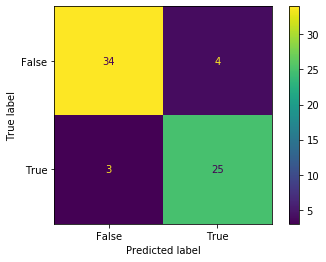

In [84]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred7)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [85]:
Accuracy = metrics.accuracy_score(y_test, y_pred7)
print(Accuracy)

0.8939393939393939


Xgboost has the highest accuracy of 89 percent. Correctly predocting the Normal patients in our test case with 100 percent accuracy and the Demented patients with 89 percent accuracy

# Predictions
Scenario: A patient develops AD symptoms & you input his vitals into the Machine Learning Algorithm.

His total brain volume is 400000 and his estimated intracranial volume is 500000.

In addition his ventricles volume is 55529.


